해당 과제는 'Brightics Studio'로 시작하는 금융 빅데이터 분석 교재를 참고함

In [283]:
import pandas as pd 
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [284]:
#시각화 패키지 라이브러리
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['font.family'] = 'Malgun Gothic' #한글깨짐현상방지
matplotlib.rcParams['axes.unicode_minus'] = False

In [285]:
df = pd.read_csv('C:/Users/ksy/Desktop/개인/코로나19 팀프로젝트/1.현황분석/read_excel/대출건수현황.csv',encoding='cp949')

In [287]:
#불필요 컬럼 제거

In [288]:
len(df)

977390

In [289]:
len(df.columns)

31

In [290]:
df['나이'].unique()

array([46, 66, 27, 54, 45, 39, 37, 50, 72, 26, 42, 28, 65, 51, 61, 33, 57,
       48, 56, 55, 34, 59, 32, 53, 44, 84, 38, 40, 35, 25, 60, 76, 41, 43,
       30, 52, 49, 77, 58, 36, 62, 47, 21, 31, 71, 63, 81, 74, 85, 73, 80,
       69, 82, 64, 23, 70, 22, 83, 67, 29, 68, 24, 79, 75, 78],
      dtype=int64)

In [291]:
#df['나이'] = df['나이'].astype(int)

In [292]:
import numpy as np
df['나이'] = np.where((df.나이 >= 10)&(df.나이 < 20),"10대",
                   np.where((df['나이'] >= 30)&(df['나이'] < 40),"30대",
                           np.where((df['나이'] >= 40)&(df['나이'] < 50),"40대",
                                   np.where((df['나이'] >= 50)&(df['나이'] < 60),"50대",
                                           np.where((df['나이'] >= 60)&(df['나이'] < 70),"60대",
                                                   np.where((df['나이'] >= 20)&(df['나이'] < 30),"20대",
                                                            np.where((df['나이'] >= 70)&(df['나이'] < 80),"70대",
                                                                     np.where((df['나이'] >= 80)&(df['나이'] < 100),"80대 이상",0))))))))


In [293]:
df['나이'].unique()

array(['40대', '60대', '20대', '50대', '30대', '70대', '80대 이상'], dtype=object)

In [294]:
카운팅 = df.groupby(['성별','나이']).count()

In [295]:
카운팅.reset_index(inplace=True)

In [296]:
카운팅 = pd.pivot_table(카운팅, index = ['나이'],values =['JOIN_KEY'], columns='성별', aggfunc = ['sum'])

In [297]:
카운팅.columns

MultiIndex([('sum', 'JOIN_KEY', 1),
            ('sum', 'JOIN_KEY', 2)],
           names=[None, None, '성별'])

In [298]:
d = dict(zip(카운팅.columns.levels[1], ['1','2']))
print(d)

{'JOIN_KEY': '1'}


# 상품

In [299]:
df.columns

Index(['JOIN_KEY', '생년월일', '성별', '나이', '은행', '상호금융', '신용카드사', '생명보험사', '손해보험사',
       '캐피탈·할부·리스·신기술사', '상호저축은행', '기타', '카드', '신용', '학자금', '전세자금', '예·적금 담보',
       '유가증권 담보', '주택담보', '주택외부동산 담보', '지급보증담보', '보금자리론', '학자금지급보증', '전세자금.1',
       '전세보증금 담보', '기타담보', '신차할부', '중고차할부', '기타할부', '금융리스', '운용리스'],
      dtype='object')

In [300]:
업권 = df.drop(columns=['은행', '상호금융', '신용카드사', '생명보험사', '손해보험사',
       '캐피탈·할부·리스·신기술사', '상호저축은행', '기타'])

In [301]:
업권.columns

Index(['JOIN_KEY', '생년월일', '성별', '나이', '카드', '신용', '학자금', '전세자금', '예·적금 담보',
       '유가증권 담보', '주택담보', '주택외부동산 담보', '지급보증담보', '보금자리론', '학자금지급보증', '전세자금.1',
       '전세보증금 담보', '기타담보', '신차할부', '중고차할부', '기타할부', '금융리스', '운용리스'],
      dtype='object')

In [302]:
연령별성별_업권 = 업권.groupby(['나이','성별']).sum().drop(columns=['JOIN_KEY', '생년월일'])

In [303]:
연령별성별_업권.reset_index(inplace=True)

In [304]:
연령별성별_업권.set_index('나이',inplace=True)

In [305]:
연령별성별_업권.columns

Index(['성별', '카드', '신용', '학자금', '전세자금', '예·적금 담보', '유가증권 담보', '주택담보',
       '주택외부동산 담보', '지급보증담보', '보금자리론', '학자금지급보증', '전세자금.1', '전세보증금 담보', '기타담보',
       '신차할부', '중고차할부', '기타할부', '금융리스', '운용리스'],
      dtype='object')

In [306]:
나이20 = 연령별성별_업권.loc['20대',:]
나이30 = 연령별성별_업권.loc['30대',:]
나이40 = 연령별성별_업권.loc['40대',:]
나이50 = 연령별성별_업권.loc['50대',:]
나이60 = 연령별성별_업권.loc['60대',:]
나이70 = 연령별성별_업권.loc['70대',:]
나이80 = 연령별성별_업권.loc['80대 이상',:]

In [307]:
나이20.set_index('성별',inplace=True)
나이20 = 나이20.T

나이30.set_index('성별',inplace=True)
나이30 = 나이30.T


나이40.set_index('성별',inplace=True)
나이40 = 나이40.T


나이50.set_index('성별',inplace=True)
나이50 = 나이50.T

나이60.set_index('성별',inplace=True)
나이60 = 나이60.T


나이70.set_index('성별',inplace=True)
나이70 = 나이70.T


나이80.set_index('성별',inplace=True)
나이80 = 나이80.T

In [308]:
나이20['남자비중']= 나이20.iloc[:,0] / 나이20.sum().sum() *100
나이20['여자비중']= 나이20.iloc[:,1] / 나이20.sum().sum() *100



나이30['남자비중']= 나이30.iloc[:,0] / 나이30.sum().sum() *100
나이30['여자비중']= 나이30.iloc[:,1] / 나이30.sum().sum() *100


나이40['남자비중']= 나이40.iloc[:,0] / 나이40.sum().sum() *100
나이40['여자비중']= 나이40.iloc[:,1] / 나이40.sum().sum() *100



나이50['남자비중']= 나이50.iloc[:,0] / 나이50.sum().sum() *100
나이50['여자비중']= 나이50.iloc[:,1] / 나이50.sum().sum() *100



나이60['남자비중']= 나이60.iloc[:,0] / 나이60.sum().sum() *100
나이60['여자비중']= 나이60.iloc[:,1] / 나이60.sum().sum() *100


나이70['남자비중']= 나이70.iloc[:,0] / 나이70.sum().sum() *100
나이70['여자비중']= 나이70.iloc[:,1] / 나이70.sum().sum() *100



나이80['남자비중']= 나이80.iloc[:,0] / 나이80.sum().sum() *100
나이80['여자비중']= 나이80.iloc[:,1] / 나이80.sum().sum() *100

In [309]:
나이20

성별,1,2,남자비중,여자비중
카드,123512,121758,7.855239,7.743418
신용,224918,178411,14.304558,11.346367
학자금,190914,188578,12.141938,11.992955
전세자금,90,135,0.005724,0.008586
예·적금 담보,24692,15276,1.570386,0.971505
유가증권 담보,2205,1745,0.140236,0.110976
주택담보,22854,17849,1.453491,1.135139
주택외부동산 담보,5069,3941,0.322383,0.250635
지급보증담보,111706,90625,7.104389,5.763459
보금자리론,4053,2877,0.257767,0.182968


In [310]:

차주수 = 나이20.iloc[:,:2]

In [311]:
차주수['전체'] = 차주수.sum(axis=1)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


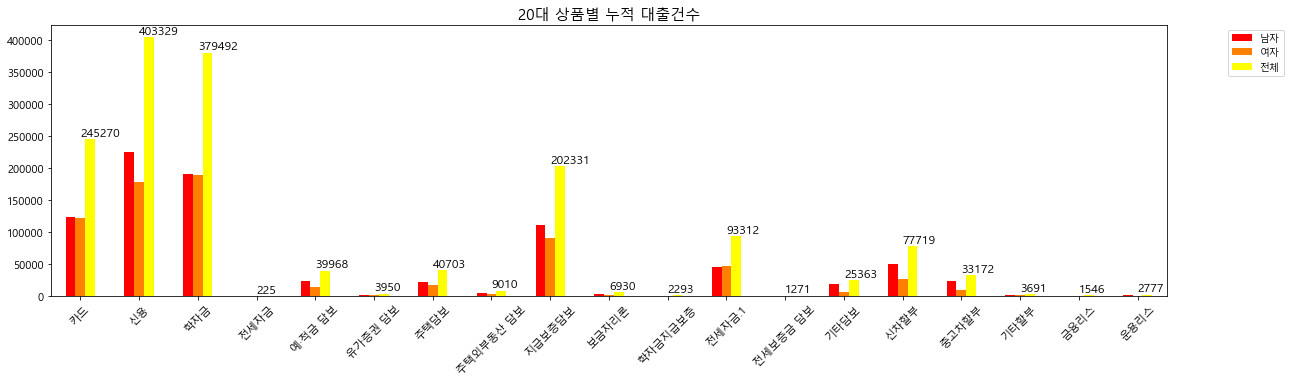

In [312]:
ax = 차주수.plot(kind='bar', cmap='autumn', figsize=(20,5), fontsize=11)

#값 표시
for i in range(len(차주수)):
    
        ax.text(x=i, y=차주수.iloc[:,2].values[i], s=차주수.iloc[:,2].values[i],
            horizontalalignment='left', verticalalignment ='bottom',fontsize=12)
    
    
#레전드 추가    
plt.legend(labels=['남자','여자','전체'],bbox_to_anchor = (1.05,1), loc='upper left')
plt.title('20대 상품별 누적 대출건수',fontsize=15)
plt.xticks(rotation=45)



fig = ax.get_figure()
ax.figure.savefig('C:/Users/ksy/Desktop/개인/코로나19 팀프로젝트/1.현황분석/png/대출현황/png/'+   ' 1-1.20대 차주수.png',bbox_inches='tight')
plt.show()

In [313]:
비중 = 나이20.iloc[:,2:]
비중['전체'] = 비중.sum(axis=1)
비중=비중.round(2)

In [314]:
비중

성별,남자비중,여자비중,전체
카드,7.86,7.74,15.60
신용,14.30,11.35,25.65
학자금,12.14,11.99,24.13
전세자금,0.01,0.01,0.01
예·적금 담보,1.57,0.97,2.54
유가증권 담보,0.14,0.11,0.25
주택담보,1.45,1.14,2.59
주택외부동산 담보,0.32,0.25,0.57
지급보증담보,7.10,5.76,12.87
보금자리론,0.26,0.18,0.44


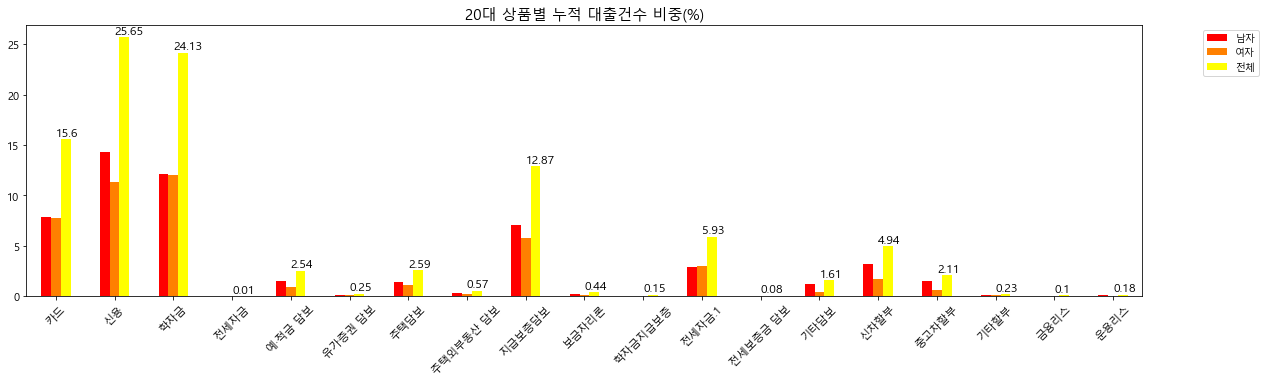

In [315]:
ax = 비중.plot(kind='bar', cmap='autumn', figsize=(20,5), fontsize=11)

#값 표시
for i in range(len(비중)):
    ax.text(x=i, y=비중.iloc[:,2].values[i], s=비중.iloc[:,2].values[i],
            horizontalalignment='left', verticalalignment ='bottom',fontsize=12)
    
#레전드 추가    
plt.legend(labels=['남자','여자','전체'],bbox_to_anchor = (1.05,1), loc='upper left')
plt.title('20대 상품별 누적 대출건수 비중(%)',fontsize=15)

plt.xticks(rotation=45)
fig = ax.get_figure()
ax.figure.savefig('C:/Users/ksy/Desktop/개인/코로나19 팀프로젝트/1.현황분석/png/대출현황/png/'+   ' 1-2.20대 차주수 비중.png',bbox_inches='tight')
plt.show()

# 30대

In [316]:
차주수 = 나이30.iloc[:,:2]
비중 = 나이30.iloc[:,2:]


차주수['전체'] = 차주수.sum(axis=1)
비중['전체'] = 비중.sum(axis=1)
비중=비중.round(2)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


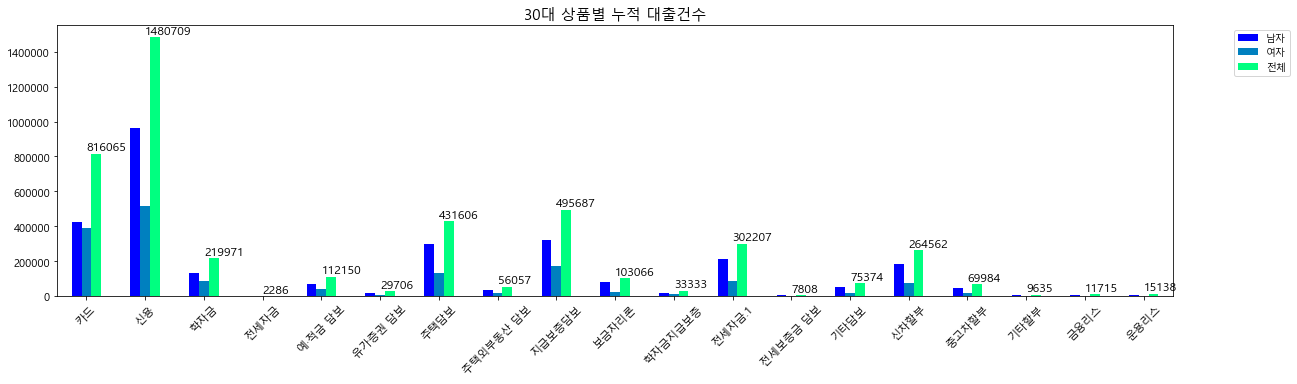

In [317]:
ax = 차주수.plot(kind='bar', cmap='winter', figsize=(20,5), fontsize=11) ####color 변경

#값 표시
for i in range(len(차주수)):
        ax.text(x=i, y=차주수.iloc[:,2].values[i], s=차주수.iloc[:,2].values[i],
            horizontalalignment='left', verticalalignment ='bottom',fontsize=12)
    
    
#레전드 추가    
plt.legend(labels=['남자','여자','전체'],bbox_to_anchor = (1.05,1), loc='upper left')
#레전드 추가    

plt.title('30대 상품별 누적 대출건수',fontsize=15) ##############변경
plt.xticks(rotation=45)


fig = ax.get_figure()
ax.figure.savefig('C:/Users/ksy/Desktop/개인/코로나19 팀프로젝트/1.현황분석/png/대출현황/png/'+   ' 2-1.30대 차주수.png',bbox_inches='tight') ############### 변경
plt.show()

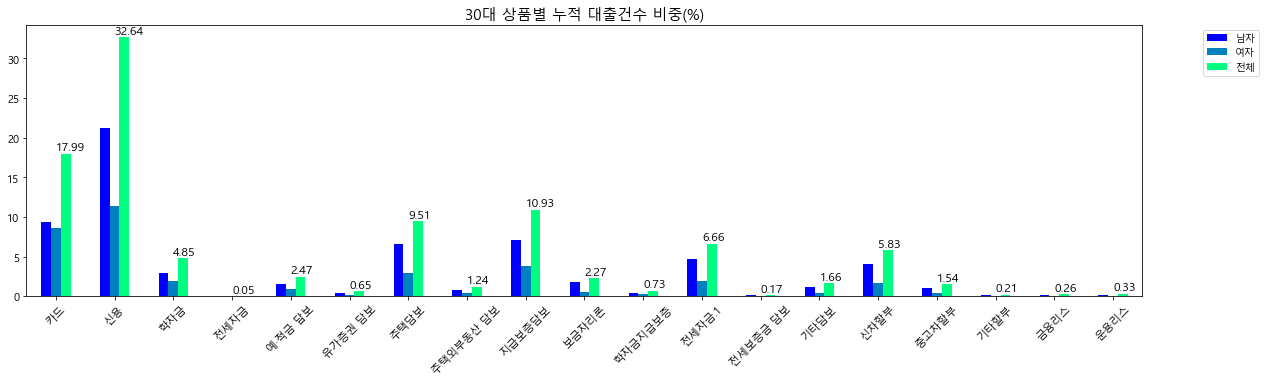

In [318]:
ax = 비중.plot(kind='bar', cmap='winter', figsize=(20,5), fontsize=11) ####color 변경

#값 표시
for i in range(len(비중)):
    ax.text(x=i, y=비중.iloc[:,2].values[i], s=비중.iloc[:,2].values[i],
            horizontalalignment='left', verticalalignment ='bottom',fontsize=12)
    
#레전드 추가    
plt.legend(labels=['남자','여자','전체'],bbox_to_anchor = (1.05,1), loc='upper left')
    
#레전드 추가    

plt.title('30대 상품별 누적 대출건수 비중(%)',fontsize=15) ##############변경
plt.xticks(rotation=45)


fig = ax.get_figure()
ax.figure.savefig('C:/Users/ksy/Desktop/개인/코로나19 팀프로젝트/1.현황분석/png/대출현황/png/'+   ' 2-2.30대 차주수 비중.png',bbox_inches='tight') ############### 변경
plt.show()

# 40대

In [319]:
차주수 = 나이40.iloc[:,:2]

비중 = 나이40.iloc[:,2:]


차주수['전체'] = 차주수.sum(axis=1)
비중['전체'] = 비중.sum(axis=1)
비중=비중.round(2)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


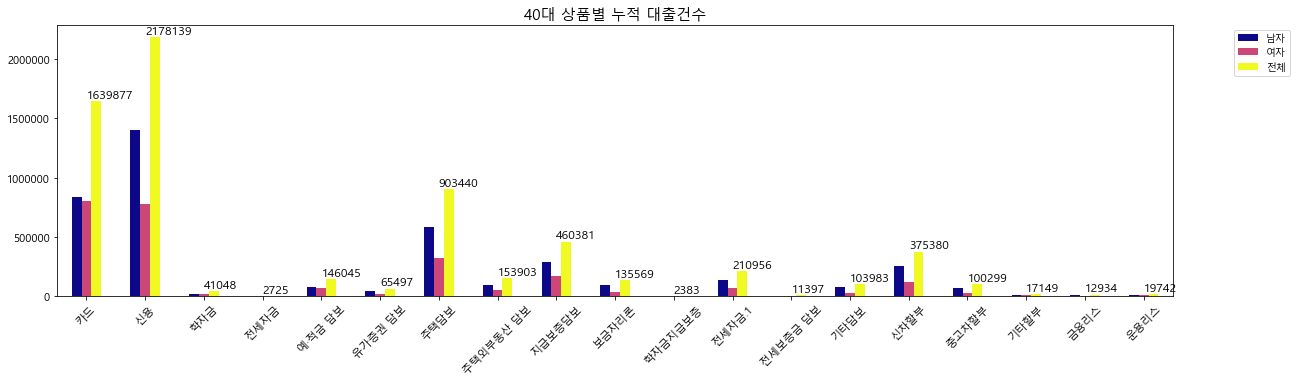

In [320]:
ax = 차주수.plot(kind='bar', cmap='plasma', figsize=(20,5), fontsize=11) ####color 변경

#값 표시
for i in range(len(차주수)):
        ax.text(x=i, y=차주수.iloc[:,2].values[i], s=차주수.iloc[:,2].values[i],
            horizontalalignment='left', verticalalignment ='bottom',fontsize=12)
    
    
#레전드 추가    
plt.legend(labels=['남자','여자','전체'],bbox_to_anchor = (1.05,1), loc='upper left')
#레전드 추가    

plt.title('40대 상품별 누적 대출건수',fontsize=15) ##############변경
plt.xticks(rotation=45)


fig = ax.get_figure()
ax.figure.savefig('C:/Users/ksy/Desktop/개인/코로나19 팀프로젝트/1.현황분석/png/대출현황/png/'+   ' 3-1.40대 차주수.png',bbox_inches='tight') ############### 변경
plt.show()

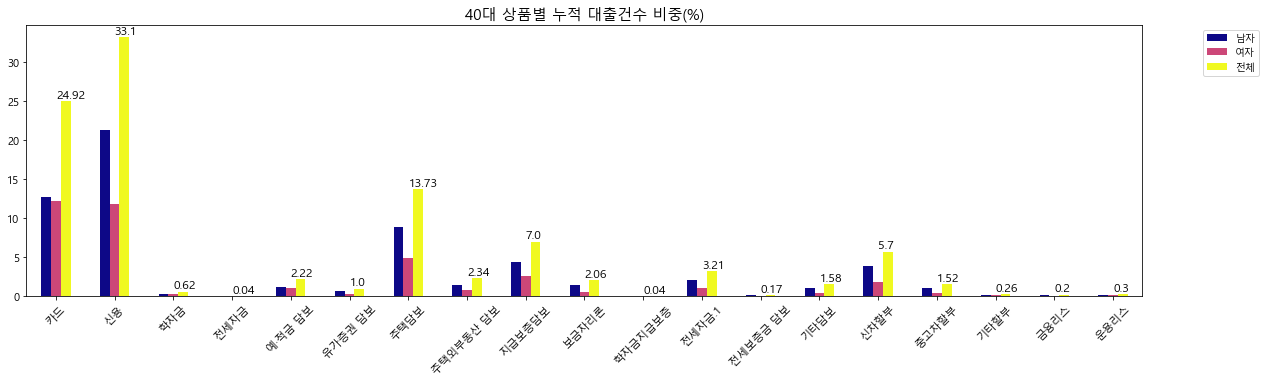

In [321]:
ax = 비중.plot(kind='bar', cmap='plasma', figsize=(20,5), fontsize=11) ####color 변경

#값 표시
for i in range(len(비중)):
    ax.text(x=i, y=비중.iloc[:,2].values[i], s=비중.iloc[:,2].values[i],
            horizontalalignment='left', verticalalignment ='bottom',fontsize=12)
    
#레전드 추가    
plt.legend(labels=['남자','여자','전체'],bbox_to_anchor = (1.05,1), loc='upper left')
plt.title('40대 상품별 누적 대출건수 비중(%)',fontsize=15) ##############변경

plt.xticks(rotation=45)

fig = ax.get_figure()
ax.figure.savefig('C:/Users/ksy/Desktop/개인/코로나19 팀프로젝트/1.현황분석/png/대출현황/png/'+   ' 3-2.40대 차주수 비중.png',bbox_inches='tight') ############### 변경
plt.show()

# 50대

In [322]:
차주수 = 나이50.iloc[:,:2]

비중 = 나이50.iloc[:,2:]


차주수['전체'] = 차주수.sum(axis=1)
비중['전체'] = 비중.sum(axis=1)
비중=비중.round(2)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


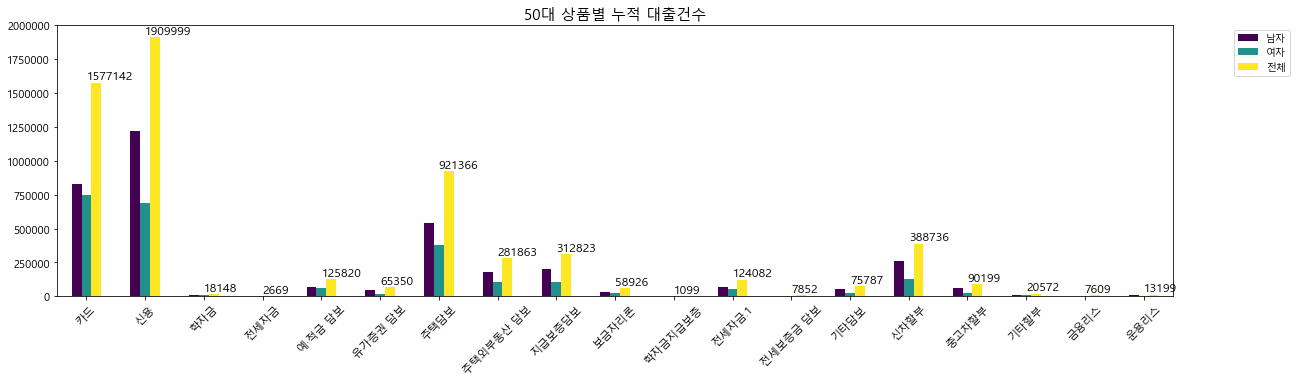

In [323]:
ax = 차주수.plot(kind='bar', cmap='viridis', figsize=(20,5), fontsize=11) ####color 변경

#값 표시
for i in range(len(차주수)):
        ax.text(x=i, y=차주수.iloc[:,2].values[i], s=차주수.iloc[:,2].values[i],
            horizontalalignment='left', verticalalignment ='bottom',fontsize=12)
    
    
#레전드 추가    
plt.legend(labels=['남자','여자','전체'],bbox_to_anchor = (1.05,1), loc='upper left')

plt.title('50대 상품별 누적 대출건수',fontsize=15) ##############변경
plt.xticks(rotation=45)
fig = ax.get_figure()
ax.figure.savefig('C:/Users/ksy/Desktop/개인/코로나19 팀프로젝트/1.현황분석/png/대출현황/png/'+   ' 4-1.50대 차주수.png',bbox_inches='tight') ############### 변경
plt.show()

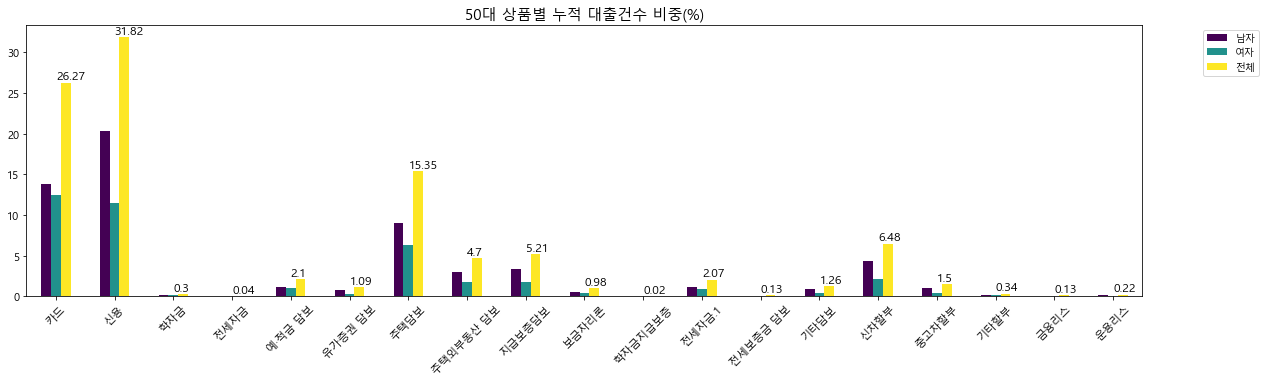

In [324]:
ax = 비중.plot(kind='bar', cmap='viridis', figsize=(20,5), fontsize=11) ####color 변경

#값 표시
for i in range(len(비중)):
    ax.text(x=i, y=비중.iloc[:,2].values[i], s=비중.iloc[:,2].values[i],
            horizontalalignment='left', verticalalignment ='bottom',fontsize=12)
    
#레전드 추가    
plt.legend(labels=['남자','여자','전체'],bbox_to_anchor = (1.05,1), loc='upper left')
plt.title('50대 상품별 누적 대출건수 비중(%)',fontsize=15) ##############변경
plt.xticks(rotation=45)


fig = ax.get_figure()
ax.figure.savefig('C:/Users/ksy/Desktop/개인/코로나19 팀프로젝트/1.현황분석/png/대출현황/png/'+   ' 4-2.50대 차주수 비중.png',bbox_inches='tight') ############### 변경
plt.show()

# 60대

In [325]:
차주수 = 나이60.iloc[:,:2]

비중 = 나이60.iloc[:,2:]


차주수['전체'] = 차주수.sum(axis=1)
비중['전체'] = 비중.sum(axis=1)
비중=비중.round(2)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


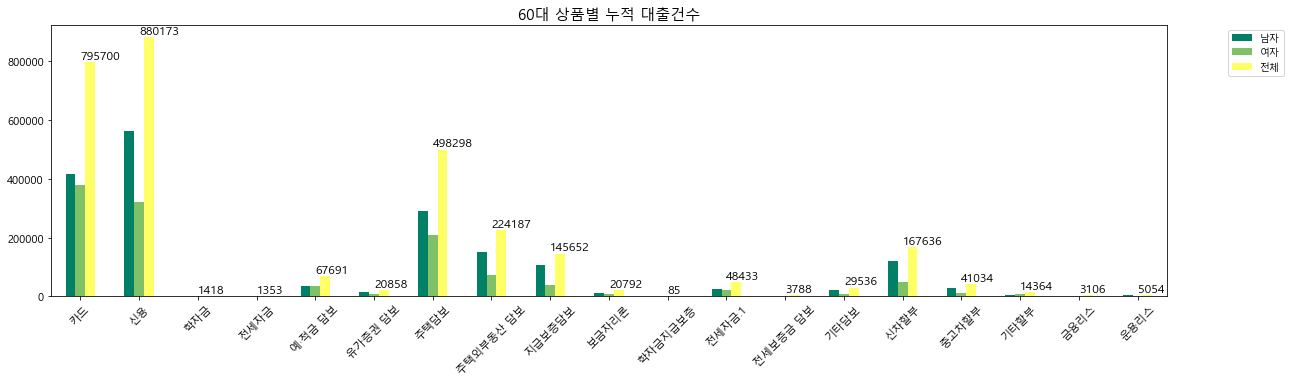

In [326]:
ax = 차주수.plot(kind='bar', cmap='summer', figsize=(20,5), fontsize=11) ####color 변경

#값 표시
for i in range(len(차주수)):
        ax.text(x=i, y=차주수.iloc[:,2].values[i], s=차주수.iloc[:,2].values[i],
            horizontalalignment='left', verticalalignment ='bottom',fontsize=12)
    
    
#레전드 추가    
plt.legend(labels=['남자','여자','전체'],bbox_to_anchor = (1.05,1), loc='upper left')
    
#레전드 추가    
plt.title('60대 상품별 누적 대출건수',fontsize=15) ##############변경
plt.xticks(rotation=45)


fig = ax.get_figure()
ax.figure.savefig('C:/Users/ksy/Desktop/개인/코로나19 팀프로젝트/1.현황분석/png/대출현황/png/'+   ' 5-1.60대 차주수.png',bbox_inches='tight') ############### 변경
plt.show()

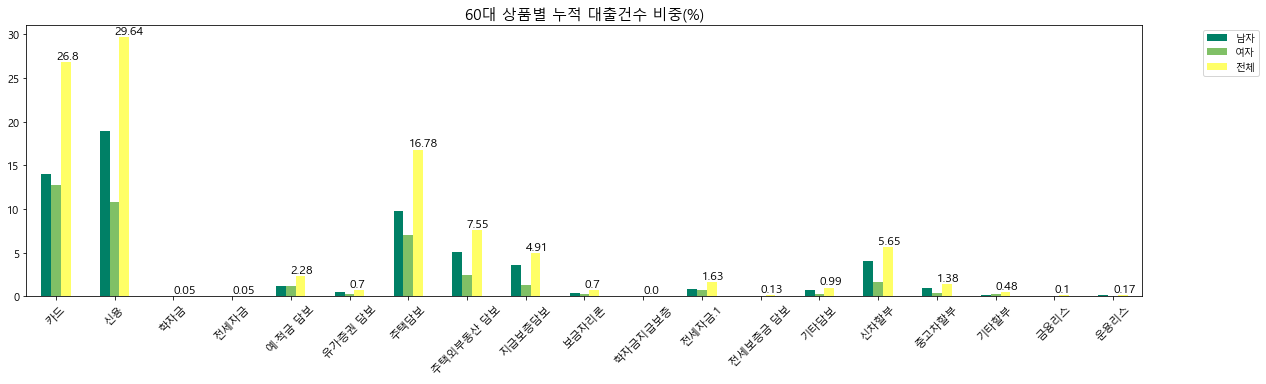

In [327]:
ax = 비중.plot(kind='bar', cmap='summer', figsize=(20,5), fontsize=11) ####color 변경

#값 표시
for i in range(len(비중)):
    ax.text(x=i, y=비중.iloc[:,2].values[i], s=비중.iloc[:,2].values[i],
            horizontalalignment='left', verticalalignment ='bottom',fontsize=12)

plt.title('60대 상품별 누적 대출건수 비중(%)',fontsize=15) ##############변경
    
#레전드 추가    
plt.legend(labels=['남자','여자','전체'],bbox_to_anchor = (1.05,1), loc='upper left')
plt.xticks(rotation=45)


fig = ax.get_figure()
ax.figure.savefig('C:/Users/ksy/Desktop/개인/코로나19 팀프로젝트/1.현황분석/png/대출현황/png/'+   ' 5-2.60대 차주수 비중.png',bbox_inches='tight') ############### 변경
plt.show()

# 70대

In [328]:
차주수 = 나이70.iloc[:,:2]

비중 = 나이70.iloc[:,2:]


차주수['전체'] = 차주수.sum(axis=1)
비중['전체'] = 비중.sum(axis=1)
비중=비중.round(2)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


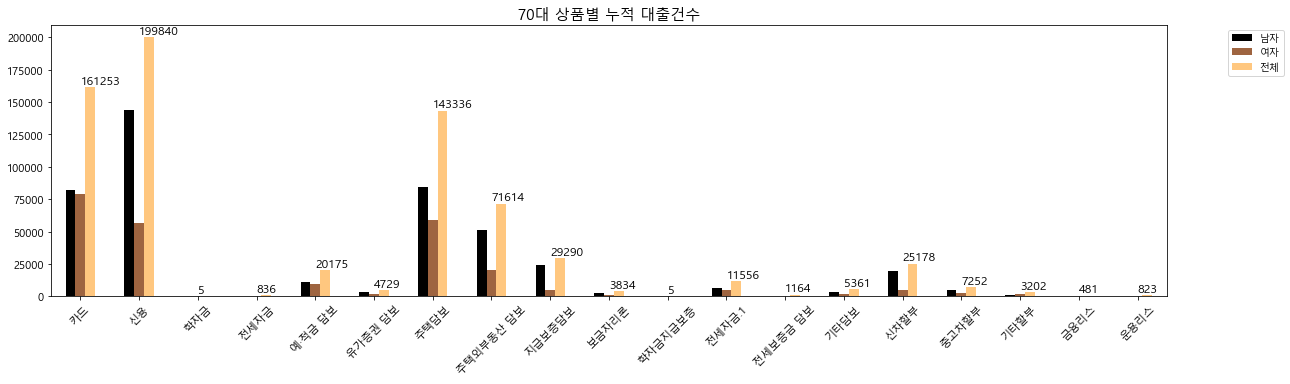

In [329]:
ax = 차주수.plot(kind='bar', cmap='copper', figsize=(20,5), fontsize=11) ####color 변경

#값 표시
for i in range(len(차주수)):
        ax.text(x=i, y=차주수.iloc[:,2].values[i], s=차주수.iloc[:,2].values[i],
            horizontalalignment='left', verticalalignment ='bottom',fontsize=12)
    
    
#레전드 추가    
plt.legend(labels=['남자','여자','전체'],bbox_to_anchor = (1.05,1), loc='upper left')

plt.title('70대 상품별 누적 대출건수',fontsize=15) ##############변경
plt.xticks(rotation=45)


fig = ax.get_figure()
ax.figure.savefig('C:/Users/ksy/Desktop/개인/코로나19 팀프로젝트/1.현황분석/png/대출현황/png/'+   ' 6-1.70대 차주수.png',bbox_inches='tight') ############### 변경
plt.show()

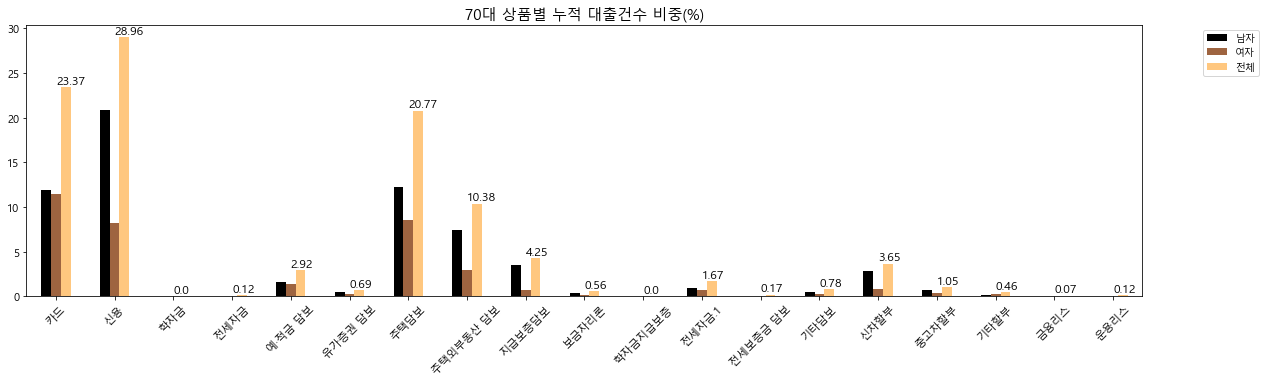

In [330]:
ax = 비중.plot(kind='bar', cmap='copper', figsize=(20,5), fontsize=11) ####color 변경

#값 표시
for i in range(len(비중)):
    ax.text(x=i, y=비중.iloc[:,2].values[i], s=비중.iloc[:,2].values[i],
            horizontalalignment='left', verticalalignment ='bottom',fontsize=12)
    
#레전드 추가    
plt.legend(labels=['남자','여자','전체'],bbox_to_anchor = (1.05,1), loc='upper left')
plt.title('70대 상품별 누적 대출건수 비중(%)',fontsize=15) ##############변경
plt.xticks(rotation=45)


fig = ax.get_figure()
ax.figure.savefig('C:/Users/ksy/Desktop/개인/코로나19 팀프로젝트/1.현황분석/png/대출현황/png/'+   ' 6-2.70대 차주수 비중.png',bbox_inches='tight') ############### 변경
plt.show()

# 80대

In [331]:
차주수 = 나이80.iloc[:,:2]

비중 = 나이80.iloc[:,2:]


차주수['전체'] = 차주수.sum(axis=1)
비중['전체'] = 비중.sum(axis=1)
비중=비중.round(2)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


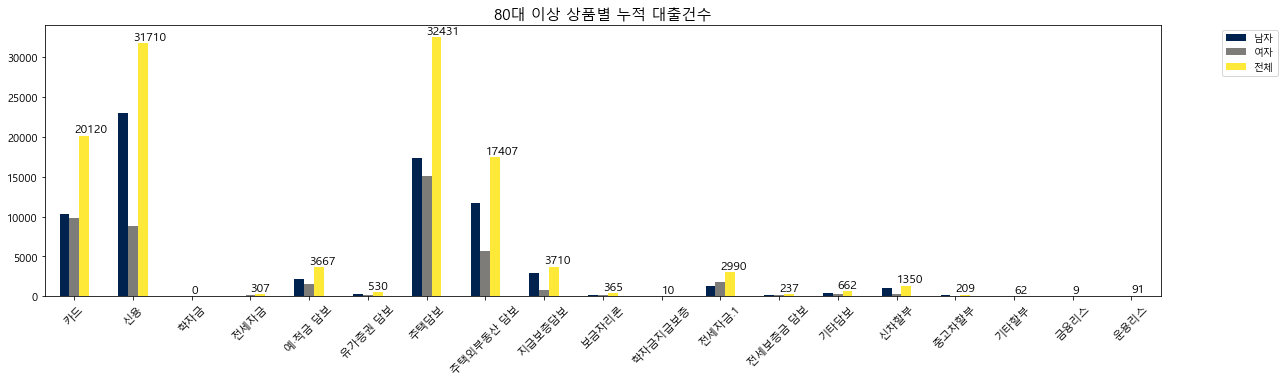

In [332]:
ax = 차주수.plot(kind='bar', cmap='cividis', figsize=(20,5), fontsize=11) ####color 변경

#값 표시
for i in range(len(차주수)):
    ax.text(x=i, y=차주수.iloc[:,2].values[i], s=차주수.iloc[:,2].values[i],
            horizontalalignment='left', verticalalignment ='bottom',fontsize=12)
    
#레전드 추가    
plt.legend(labels=['남자','여자','전체'],bbox_to_anchor = (1.05,1), loc='upper left')

plt.title('80대 이상 상품별 누적 대출건수',fontsize=15) ##############변경
plt.xticks(rotation=45)


fig = ax.get_figure()
ax.figure.savefig('C:/Users/ksy/Desktop/개인/코로나19 팀프로젝트/1.현황분석/png/대출현황/png/'+   ' 7-1.80대 차주수.png',bbox_inches='tight') ############### 변경
plt.show()

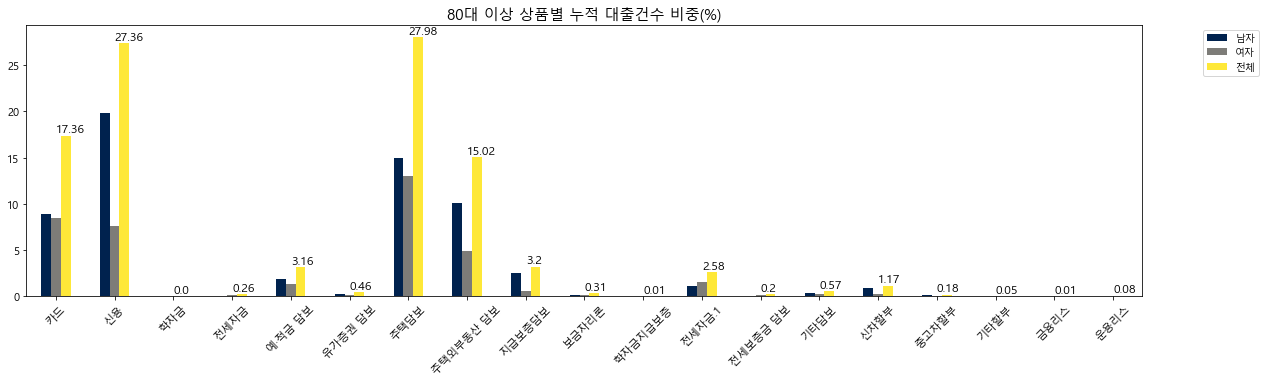

In [333]:
ax = 비중.plot(kind='bar', cmap='cividis', figsize=(20,5), fontsize=11) ####color 변경

#값 표시
for i in range(len(비중)):
    ax.text(x=i, y=비중.iloc[:,2].values[i], s=비중.iloc[:,2].values[i],
            horizontalalignment='left', verticalalignment ='bottom',fontsize=12)
    
#레전드 추가    
plt.legend(labels=['남자','여자','전체'],bbox_to_anchor = (1.05,1), loc='upper left')
plt.title('80대 이상 상품별 누적 대출건수 비중(%)',fontsize=15) ##############변경
plt.xticks(rotation=45)


fig = ax.get_figure()
ax.figure.savefig('C:/Users/ksy/Desktop/개인/코로나19 팀프로젝트/1.현황분석/png/대출현황/png/'+   ' 7-2.80대 차주수 비중.png',bbox_inches='tight') ############### 변경
plt.show()

In [154]:
나이20

성별,1,2,남자비중,여자비중
카드대출,123512,121758,7.855239,7.743418
신용대출,224918,178411,14.304558,11.346367
학자금대출,190914,188578,12.141938,11.992955
전세자금대출,90,135,0.005724,0.008586
예·적금담보대출,24692,15276,1.570386,0.971505
"유가증권(주식,채권,펀드 등)담보대출",2205,1745,0.140236,0.110976
주택담보대출,22854,17849,1.453491,1.135139
"주택외부동산(토지,상가 등)담보대출",5069,3941,0.322383,0.250635
지급보증(보증서)담조대출,111706,90625,7.104389,5.763459
보금자리론,4053,2877,0.257767,0.182968


In [155]:
나이30

성별,1,2,남자비중,여자비중
카드대출,425687,390378,9.382444,8.604086
신용대출,964885,515824,21.266750,11.368966
학자금대출,133514,86457,2.942743,1.905547
전세자금대출,1853,433,0.040841,0.009543
예·적금담보대출,69796,42354,1.538353,0.933499
"유가증권(주식,채권,펀드 등)담보대출",20706,9000,0.456375,0.198364
주택담보대출,300575,131031,6.624886,2.887975
"주택외부동산(토지,상가 등)담보대출",37052,19005,0.816652,0.418878
지급보증(보증서)담조대출,321936,173751,7.095698,3.829541
보금자리론,79289,23777,1.747586,0.524055


In [156]:
나이40

성별,1,2,남자비중,여자비중
카드대출,838327,801550,12.738892,12.179930
신용대출,1400362,777777,21.279358,11.818688
학자금대출,20027,21021,0.304323,0.319424
전세자금대출,2089,636,0.031744,0.009664
예·적금담보대출,79448,66597,1.207261,1.011973
"유가증권(주식,채권,펀드 등)담보대출",47442,18055,0.720910,0.274354
주택담보대출,583878,319562,8.872384,4.855895
"주택외부동산(토지,상가 등)담보대출",99207,54696,1.507511,0.831131
지급보증(보증서)담조대출,289048,171333,4.392261,2.603486
보금자리론,99044,36525,1.505034,0.555015


In [157]:
나이50

성별,1,2,남자비중,여자비중
카드대출,829776,747366,13.822134,12.449251
신용대출,1218486,691513,20.297136,11.518879
학자금대출,7027,11121,0.117053,0.185248
전세자금대출,1554,1115,0.025886,0.018573
예·적금담보대출,67413,58407,1.122943,0.972915
"유가증권(주식,채권,펀드 등)담보대출",50332,15018,0.838414,0.250162
주택담보대출,542447,378919,9.035902,6.311844
"주택외부동산(토지,상가 등)담보대출",178096,103767,2.966664,1.728499
지급보증(보증서)담조대출,205343,107480,3.420536,1.790348
보금자리론,33551,25375,0.558881,0.422684


In [158]:
나이60

성별,1,2,남자비중,여자비중
카드대출,417012,378688,14.044790,12.753794
신용대출,560905,319268,18.891046,10.752594
학자금대출,789,629,0.026573,0.021184
전세자금대출,745,608,0.025091,0.020477
예·적금담보대출,34171,33520,1.150865,1.128917
"유가증권(주식,채권,펀드 등)담보대출",14153,6705,0.476667,0.225817
주택담보대출,291122,207176,9.804867,6.977459
"주택외부동산(토지,상가 등)담보대출",151154,73033,5.090804,2.459671
지급보증(보증서)담조대출,105476,40176,3.552388,1.353083
보금자리론,12307,8485,0.414495,0.285765


In [159]:
나이70

성별,1,2,남자비중,여자비중
카드대출,82175,79078,11.910560,11.460615
신용대출,143504,56336,20.799671,8.164663
학자금대출,5,0,0.000725,0.000000
전세자금대출,535,301,0.077544,0.043623
예·적금담보대출,10818,9357,1.567976,1.356091
"유가증권(주식,채권,펀드 등)담보대출",3112,1617,0.451058,0.234349
주택담보대출,84566,58770,12.257114,8.517418
"주택외부동산(토지,상가 등)담보대출",51356,20258,7.443611,2.935951
지급보증(보증서)담조대출,24291,4999,3.520772,0.724495
보금자리론,2535,1299,0.367426,0.188261


In [70]:
나이80

성별,1,2,남자비중,여자비중,전체
카드대출,10299,9821,8.89,8.47,17.36
신용대출,22949,8761,19.81,7.56,27.36
학자금대출,0,0,0.00,0.00,0.00
전세자금대출,86,221,0.07,0.19,0.26
예·적금담보대출,2160,1507,1.86,1.30,3.16
"유가증권(주식,채권,펀드 등)담보대출",312,218,0.27,0.19,0.46
주택담보대출,17320,15111,14.95,13.03,27.98
"주택외부동산(토지,상가 등)담보대출",11702,5705,10.10,4.92,15.02
지급보증(보증서)담조대출,2976,734,2.57,0.63,3.20
보금자리론,199,166,0.17,0.14,0.31
